#Name : Aryan Patole
#Oasis Infobyte : Data Science 
#Internship Task 3 : Car Price Prediction  

#IMPORTING LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#LOADING THE DATASET

In [2]:
df=pd.read_csv("/content/CarPrice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


#ANALIZING THE DATASET

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.shape 

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df["CarName"].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [8]:
df["fueltype"].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [9]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
print(df['fueltype'].unique())
print(df['carbody'].unique())
print(df['horsepower'].unique())

['gas' 'diesel']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
[111 154 102 115 110 140 160 101 121 182  48  70  68  88 145  58  76  60
  86 100  78  90 176 262 135  84  64 120  72 123 155 184 175 116  69  55
  97 152 200  95 142 143 207 288  73  82  94  62  56 112  92 161 156  52
  85 114 162 134 106]


#VISUALIZING THE DATASET

<Axes: xlabel='CarName', ylabel='price'>

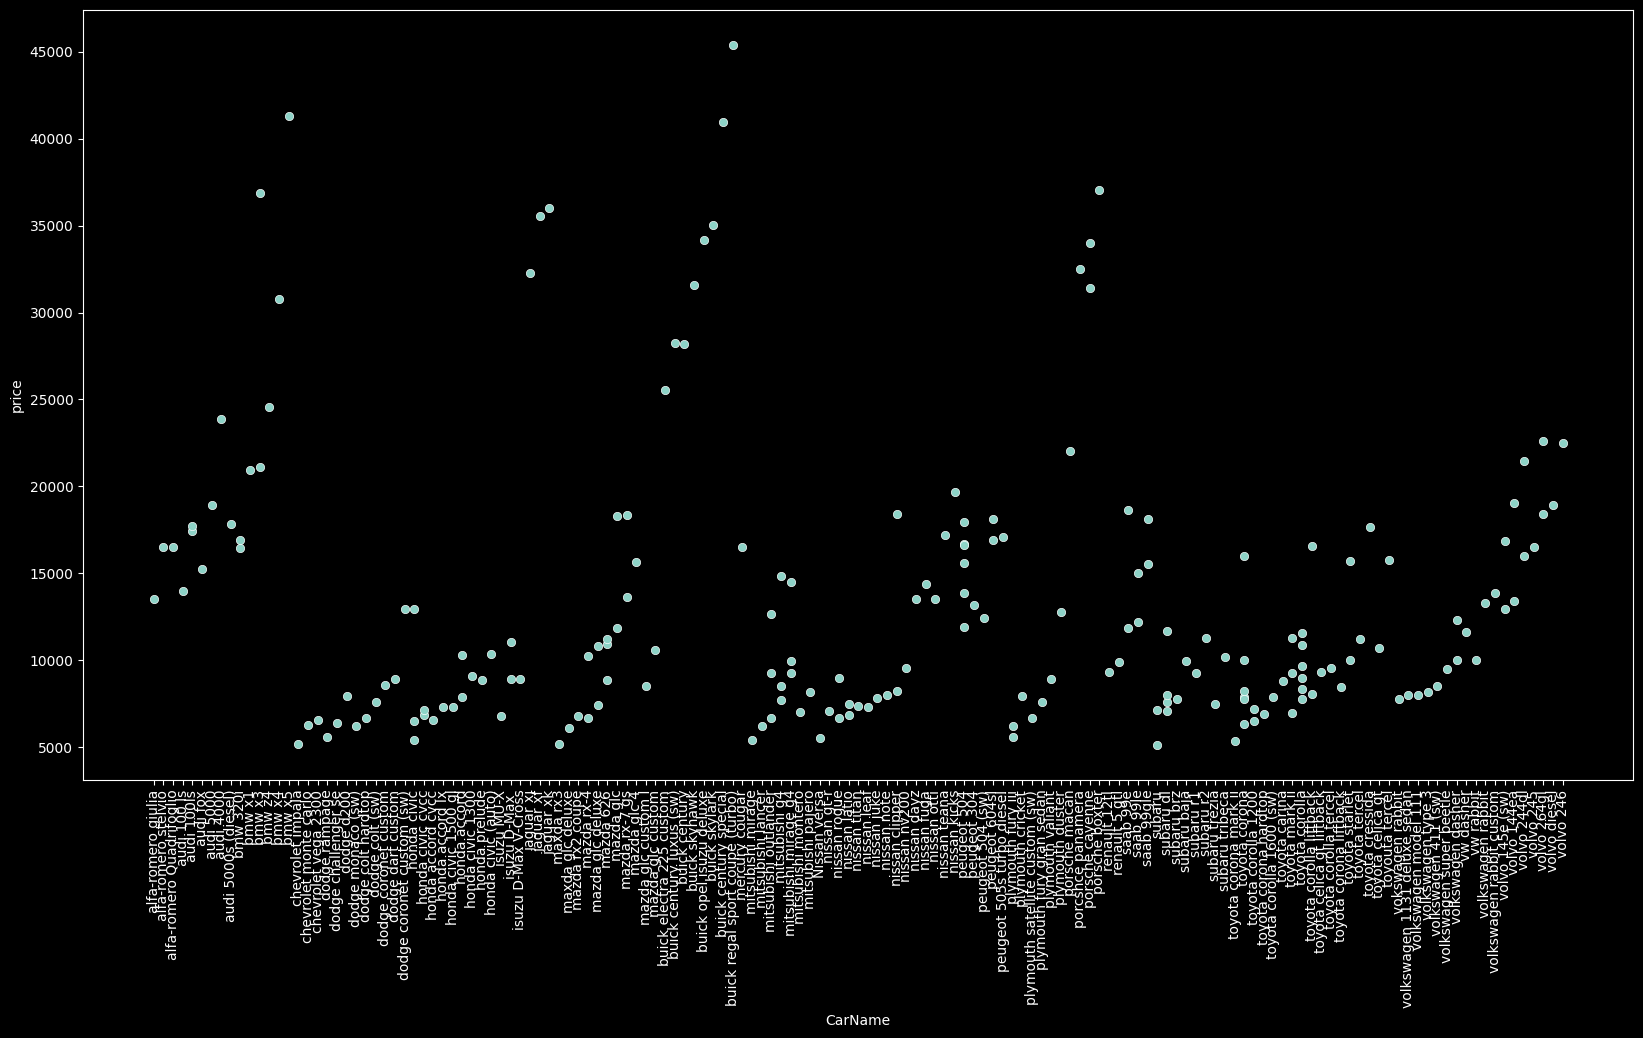

In [13]:
plt.figure(figsize=(20, 10))
plt.style.use("dark_background")
plt.xticks(rotation=90)
sns.scatterplot(x='CarName', y='price', data=df)


<Axes: xlabel='fuelsystem', ylabel='price'>

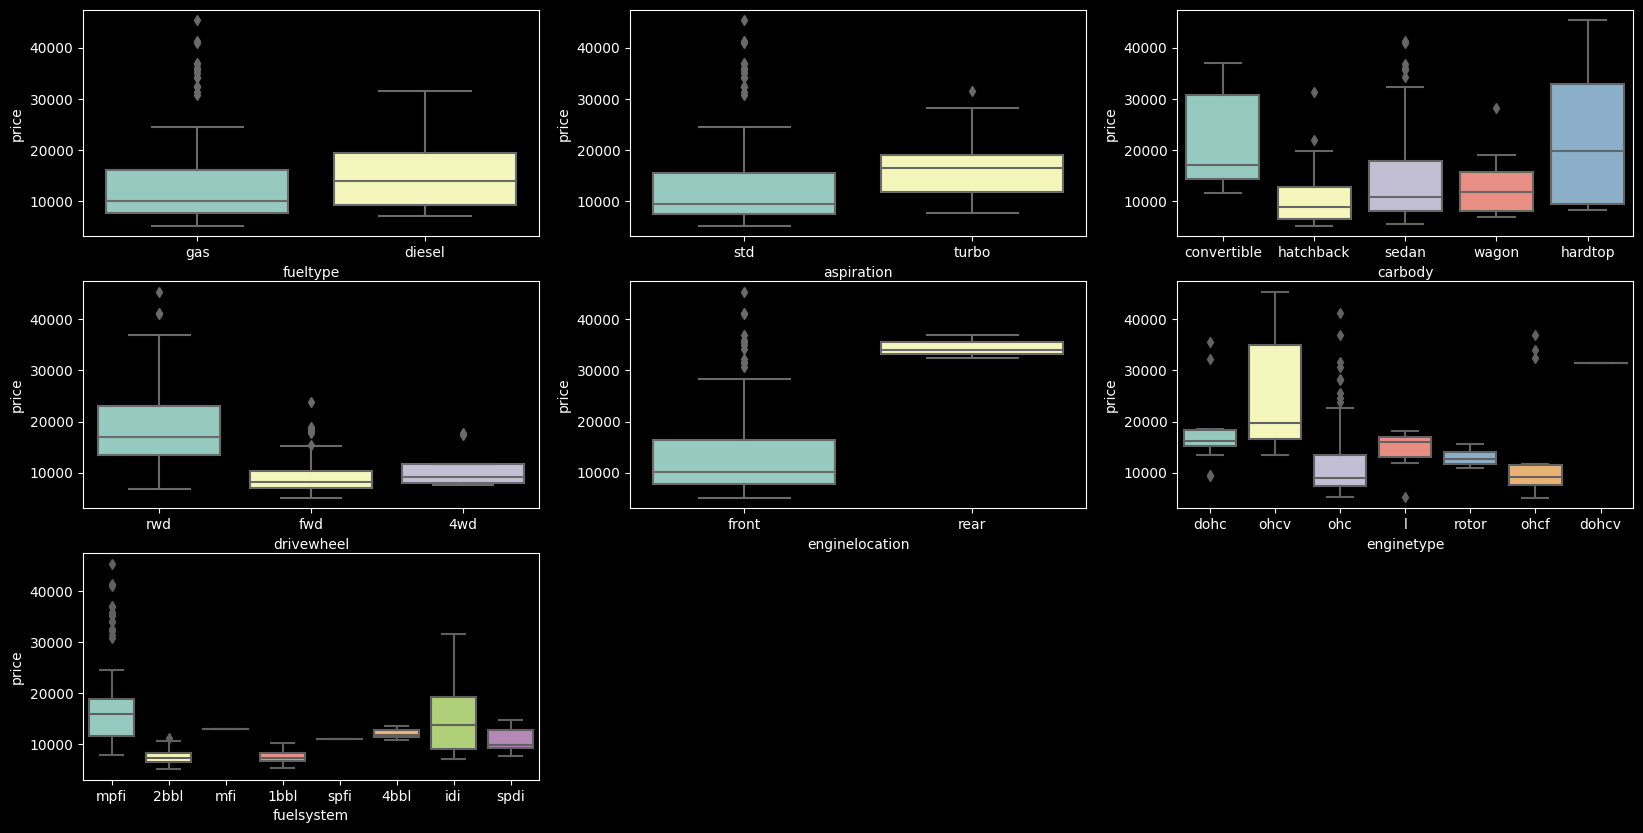

In [14]:
plt.figure(figsize=(20, 10))
plt.style.use("dark_background")
plt.subplot(3, 3, 1) 
sns.boxplot(x='fueltype', y='price', data=df)
plt.subplot(3, 3, 2) 
sns.boxplot(x='aspiration', y='price', data=df)
plt.subplot(3, 3, 3) 
sns.boxplot(x='carbody', y='price', data=df)
plt.subplot(3, 3, 4)
sns.boxplot(x='drivewheel', y='price', data=df)
plt.subplot(3, 3, 5)
sns.boxplot(x='enginelocation', y='price', data=df)
plt.subplot(3, 3, 6)
sns.boxplot(x='enginetype', y='price', data=df)
plt.subplot(3, 3, 7)
sns.boxplot(x='fuelsystem', y='price', data=df)

#SELECTING SPECIFIC COLUMNS FOR PREDICTION

In [15]:
final_dataset = df[['CarName', 'fueltype', 'carbody',
       'price','horsepower']]

In [16]:
final_dataset.head()

,CarName,fueltype,carbody,price,horsepower
0,alfa-romero giulia,gas,convertible,13495.0,111
1,alfa-romero stelvio,gas,convertible,16500.0,111
2,alfa-romero Quadrifoglio,gas,hatchback,16500.0,154
3,audi 100 ls,gas,sedan,13950.0,102
4,audi 100ls,gas,sedan,17450.0,115


In [17]:
final_dataset.head()

,CarName,fueltype,carbody,price,horsepower
0,alfa-romero giulia,gas,convertible,13495.0,111
1,alfa-romero stelvio,gas,convertible,16500.0,111
2,alfa-romero Quadrifoglio,gas,hatchback,16500.0,154
3,audi 100 ls,gas,sedan,13950.0,102
4,audi 100ls,gas,sedan,17450.0,115


#VISUALIZING THE SELECTED COLUMNS

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


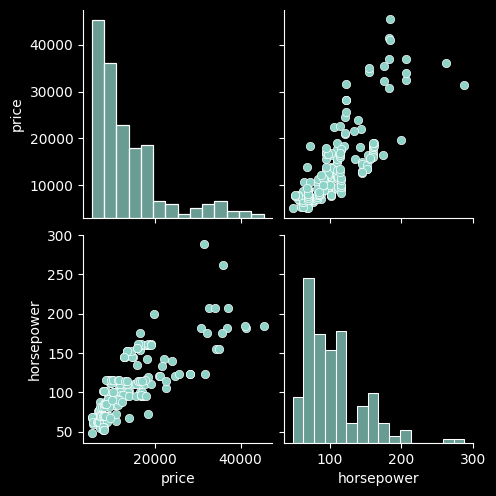

In [18]:
sns.pairplot(final_dataset, palette="dark green")
plt.show()

In [19]:
print(df['fueltype'].unique())

['gas' 'diesel']


In [20]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [21]:
final_dataset.head()

,price,horsepower,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),...,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,13495.0,111,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,111,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,154,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,13950.0,102,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,17450.0,115,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [22]:
final_dataset.corr(method ='pearson')

,price,horsepower,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),...,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
price,1.000000,0.808139,0.028318,0.001918,0.028318,0.005915,0.053598,0.093110,0.049579,0.040259,...,0.080767,0.090246,0.049842,-0.014775,-0.028963,-0.105679,0.225854,-0.262039,0.125716,-0.042310
horsepower,0.808139,1.000000,0.088535,0.012216,0.012216,-0.003758,0.021093,0.063687,0.010441,0.099184,...,0.003342,0.085256,0.102734,-0.025056,-0.025056,0.163926,0.194801,-0.053770,-0.024097,-0.063081
CarName_alfa-romero Quadrifoglio,0.028318,0.088535,1.000000,-0.004902,-0.004902,-0.004902,-0.006949,-0.004902,-0.004902,-0.004902,...,-0.004902,-0.006949,-0.004902,-0.004902,-0.004902,0.023020,-0.014109,0.097231,-0.065706,-0.026093
CarName_alfa-romero giulia,0.001918,0.012216,-0.004902,1.000000,-0.004902,-0.004902,-0.006949,-0.004902,-0.004902,-0.004902,...,-0.004902,-0.006949,-0.004902,-0.004902,-0.004902,0.023020,-0.014109,-0.050416,-0.065706,-0.026093
CarName_alfa-romero stelvio,0.028318,0.012216,-0.004902,-0.004902,1.000000,-0.004902,-0.006949,-0.004902,-0.004902,-0.004902,...,-0.004902,-0.006949,-0.004902,-0.004902,-0.004902,0.023020,-0.014109,-0.050416,-0.065706,-0.026093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fueltype_gas,-0.105679,0.163926,0.023020,0.023020,0.023020,0.023020,0.032636,0.023020,0.023020,0.023020,...,-0.212939,0.032636,0.023020,0.023020,0.023020,1.000000,-0.018635,0.202093,-0.185623,-0.028183
carbody_hardtop,0.225854,0.194801,-0.014109,-0.014109,-0.014109,-0.014109,-0.020002,-0.014109,-0.014109,-0.014109,...,-0.014109,-0.020002,-0.014109,-0.014109,-0.014109,-0.018635,1.000000,-0.145109,-0.189119,-0.075101
carbody_hatchback,-0.262039,-0.053770,0.097231,-0.050416,-0.050416,-0.050416,-0.071474,-0.050416,-0.050416,0.097231,...,-0.050416,-0.071474,-0.050416,-0.050416,0.097231,0.202093,-0.145109,1.000000,-0.675779,-0.268359
carbody_sedan,0.125716,-0.024097,-0.065706,-0.065706,-0.065706,0.074604,0.105766,0.074604,-0.065706,-0.065706,...,0.074604,0.105766,-0.065706,-0.065706,-0.065706,-0.185623,-0.189119,-0.675779,1.000000,-0.349749


In [23]:
corrmat = df.corr(method='pearson')

<ipython-input-23-1353ac793ee1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr(method='pearson')


In [24]:
corrmat.index

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<ipython-input-25-ef05cfca7afa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr(method='pearson')


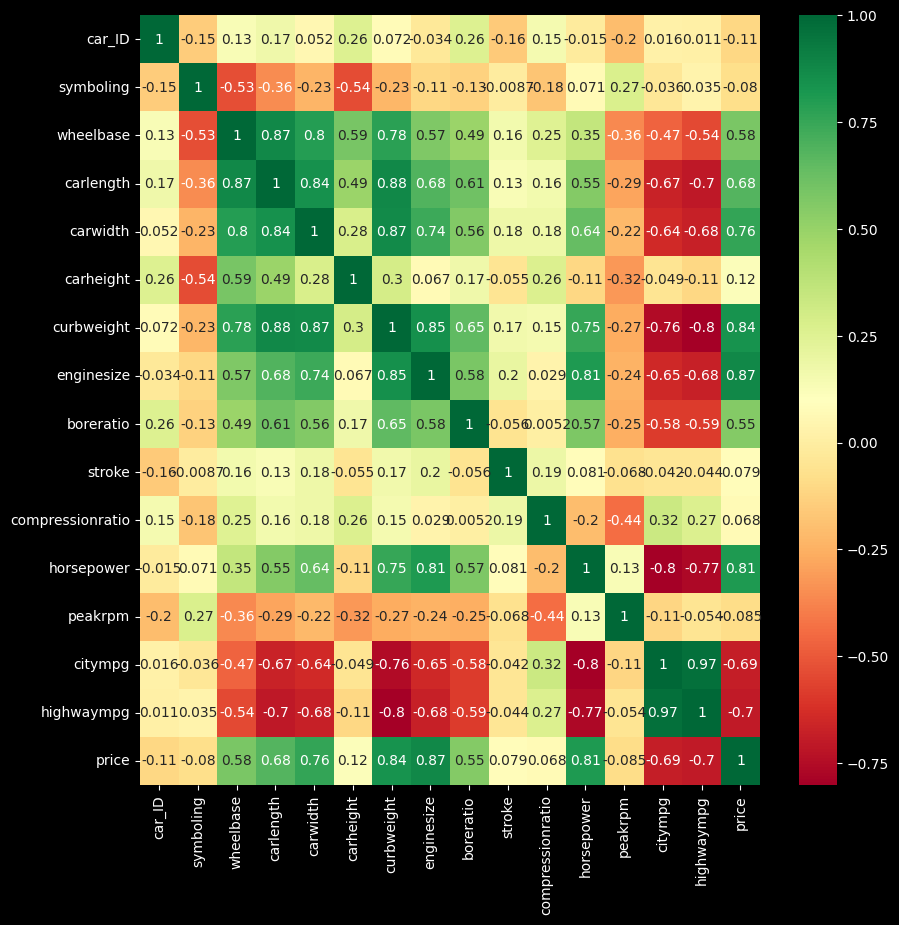

In [25]:
corrmat = df.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

g=sns.heatmap(df[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")
 

In [26]:
final_dataset

,price,horsepower,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),...,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,13495.0,111,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,111,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,154,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,13950.0,102,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,17450.0,115,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,114,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
201,19045.0,160,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
202,21485.0,134,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
203,22470.0,106,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [27]:
final_dataset.iloc[:,0]

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

#MODEL BUILDING


In [28]:
X= final_dataset.iloc[:,1:]
Y = final_dataset.iloc[:,0] 

In [29]:
final_dataset.head

<bound method NDFrame.head of        price  horsepower  CarName_alfa-romero Quadrifoglio  \
0    13495.0         111                                 0   
1    16500.0         111                                 0   
2    16500.0         154                                 1   
3    13950.0         102                                 0   
4    17450.0         115                                 0   
..       ...         ...                               ...   
200  16845.0         114                                 0   
201  19045.0         160                                 0   
202  21485.0         134                                 0   
203  22470.0         106                                 0   
204  22625.0         114                                 0   

     CarName_alfa-romero giulia  CarName_alfa-romero stelvio  \
0                             1                            0   
1                             0                            1   
2                             0  

In [31]:
X.head()

,horsepower,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,...,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,111,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,111,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,154,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,102,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,115,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [32]:
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()

model.fit(X,Y)

ExtraTreesRegressor()

In [34]:
print(model.feature_importances_)

[6.88384637e-01 1.76338220e-04 2.23868954e-04 3.18095093e-04
 7.59267063e-04 1.89319827e-03 2.58833595e-03 1.53825755e-03
 5.95808167e-05 2.89839973e-04 3.74769485e-03 4.03297086e-04
 1.12863442e-03 1.76121360e-03 9.39949145e-03 4.26292454e-03
 2.59127929e-05 8.15446876e-05 7.15140113e-03 2.06497023e-04
 1.99345340e-02 3.87388068e-02 1.05226775e-03 1.82449634e-02
 3.29704332e-05 2.53809016e-05 3.19523279e-05 2.07592025e-06
 4.01072302e-05 1.94906256e-06 6.88359050e-04 1.19713217e-04
 2.32236401e-04 4.99601895e-07 4.74304871e-07 2.05998699e-05
 3.36615952e-04 6.25406751e-05 1.74993094e-05 4.86475913e-04
 2.11234759e-04 6.61546604e-05 2.48807115e-06 7.78102178e-05
 2.09005128e-05 2.79113926e-04 1.59920947e-04 3.18849793e-05
 4.14978841e-03 3.46460722e-03 2.50488061e-04 1.95291583e-06
 4.06657919e-05 4.25106668e-04 7.15390935e-04 4.09113707e-04
 2.41498195e-04 2.91839031e-05 2.71553216e-04 2.45528712e-04
 7.83515757e-03 6.33858679e-05 3.30854478e-04 4.65467411e-04
 3.21147565e-07 3.180090

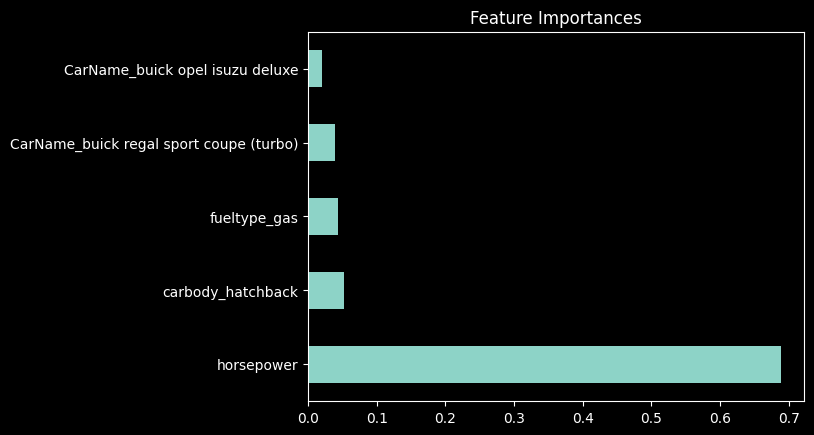

In [35]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

#MODEL TRAINING

In [36]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [37]:
X_train.shape

(164, 152)

In [38]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [39]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [63]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [41]:
max_depth

[5, 10, 15, 20, 25, 30]

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [44]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [45]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.7s
[CV] END max_depth=5, max_feat

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

#PREDICTING THE CAR PRICE

In [46]:
predictions=rf_random.predict(X_test)

In [47]:
predictions1=rf_random.predict(X_train)

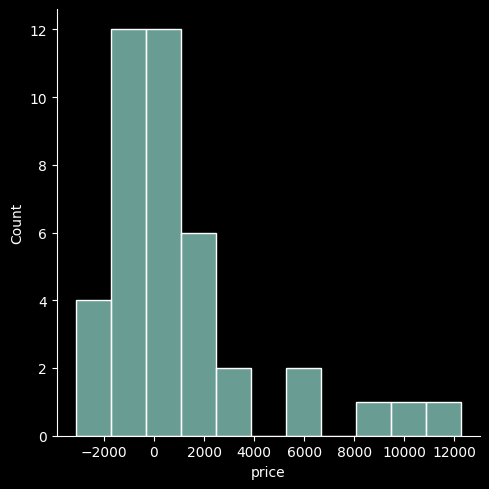

In [48]:
sns.displot(y_test-predictions)

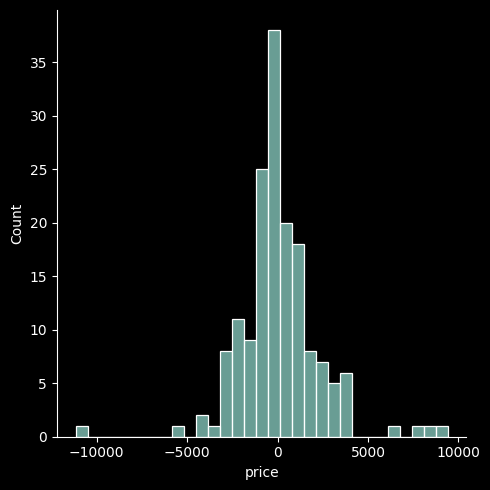

In [50]:
sns.displot(y_train-predictions1)

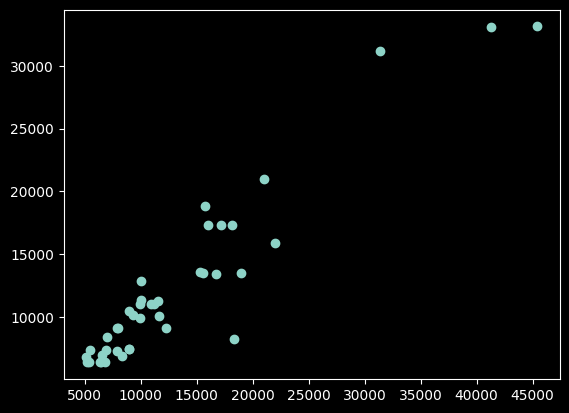

In [51]:
plt.scatter(y_test,predictions)

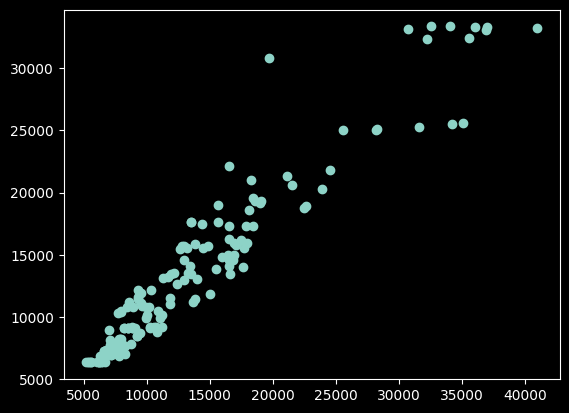

In [52]:
plt.scatter(y_train,predictions1)

In [53]:
import pickle
file = open('random_forest_regression_model.pkl', 'wb')
pickle.dump(rf_random, file)

#PREDICTED CAR PRICE

In [54]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
print("RMSE : {:.2f}".format(rmse))

RMSE : 3367.73


In [55]:
from sklearn.metrics import r2_score
r = r2_score(y_test, predictions)
print("R2 score : {}" . format(r))

R2 score : 0.8534984222090658


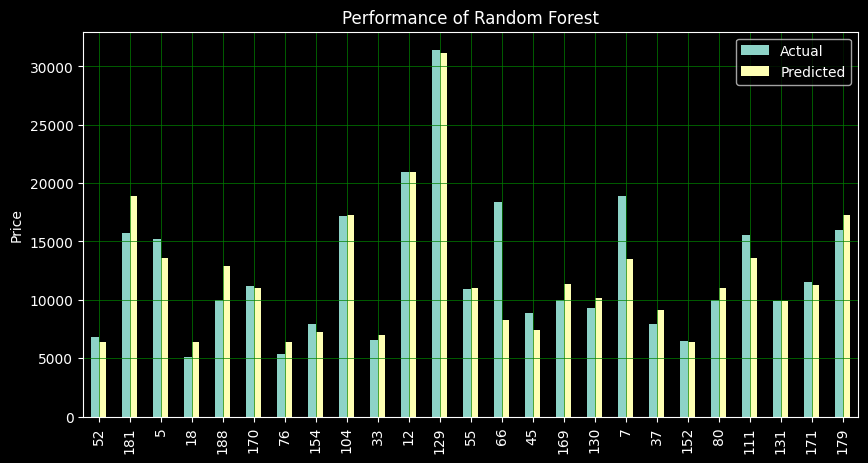

In [56]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_check = df_check.head(25)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Price')
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse_predict = round(mean_squared_error(y_test,predictions),4)
mae_predict = round(mean_absolute_error(y_test,predictions),4)
print ('MSE is:'+str(mse_predict))
print ('MAE is:'+str(mae_predict))

MSE is:11341618.6264
MAE is:2049.9998


#ACCURACY OF MODEL

In [58]:
import warnings
warnings.filterwarnings("ignore")

In [59]:
cutoff = 1.8                              
y_pred_classes = np.zeros_like(predictions)
y_test_classes = np.zeros_like(predictions)     
y_pred_classes[abs(y_test - predictions) > cutoff] = 1  

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

In [61]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test_classes, y_pred_classes)
print(matrix)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      41.0
         1.0       0.00      0.00      0.00       0.0

    accuracy                           0.00      41.0
   macro avg       0.00      0.00      0.00      41.0
weighted avg       0.00      0.00      0.00      41.0



In [62]:
from sklearn.metrics import accuracy_score
s = accuracy_score(y_test_classes,y_pred_classes)
print("accuracy of the model : {}" . format(s))

accuracy of the model : 0.0


#THANK YOU